## Python project for analyzing and developing different buying strategies 

In [1]:
import json
from coin_data import get_coin_data, plot_actions, plot_profit

In [2]:
json_file_path = "config.json"

# Open and read the JSON file
with open(json_file_path, "r") as json_file:
    config = json.load(json_file)

# print config file
for property, property_info in config.items():
    print(property, ":", property_info["description"])
print("")

# print config properties values
coin = config["coin"]["value"]
print("coin:", coin)

interval = config["interval"]["value"]
print("interval:", interval)

period = config["period"]["value"]
print("period:", period)

portfolio_size = config["portfolio_size"]["value"]
print("portfolio_size:", portfolio_size)

coin : Coin symbol to be used with yfinance.Ticker. Find supported coins on the https://finance.yahoo.com/ website
interval : Interval between each ticker data point.
period : Period of time that specifies the time interval to be used when fetching data: [period, currentTime]. Possible values are: [d, mo, y, max]
portfolio_size : Initial amount of money (USD) to be used by the trading agent.
DCA_interval : Interval between each DCA (Dollar Cost Averaging) investment (as value * ticker intervals).
BB_window : Window size for the Bollinger Bands indicator.
BB_std : Standard deviation for the Bollinger Bands indicator.

coin: BTC-USD
interval: 5m
period: 59d
portfolio_size: 2000


In [3]:
# get coin data
coin_data = get_coin_data(coin, interval, period)

coin_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-09-16 00:00:00+00:00,26606.199219,26622.439453,26606.199219,26606.925781,0,0.0,0.0
2023-09-16 00:05:00+00:00,26585.482422,26628.158203,26585.482422,26628.158203,17170432,0.0,0.0
2023-09-16 00:10:00+00:00,26631.566406,26637.265625,26629.873047,26629.873047,26180608,0.0,0.0
2023-09-16 00:15:00+00:00,26634.955078,26634.955078,26602.679688,26629.667969,2314240,0.0,0.0
2023-09-16 00:20:00+00:00,26649.744141,26660.398438,26649.744141,26656.228516,24563712,0.0,0.0
...,...,...,...,...,...,...,...
2023-11-13 20:55:00+00:00,36834.765625,36834.765625,36767.406250,36767.406250,63188992,0.0,0.0
2023-11-13 21:00:00+00:00,36777.253906,36785.496094,36750.605469,36750.605469,47501312,0.0,0.0
2023-11-13 21:05:00+00:00,36731.996094,36731.996094,36704.292969,36715.937500,46344192,0.0,0.0


DCA_interval: 7
dca_investment_amount: 0.8312551953449709


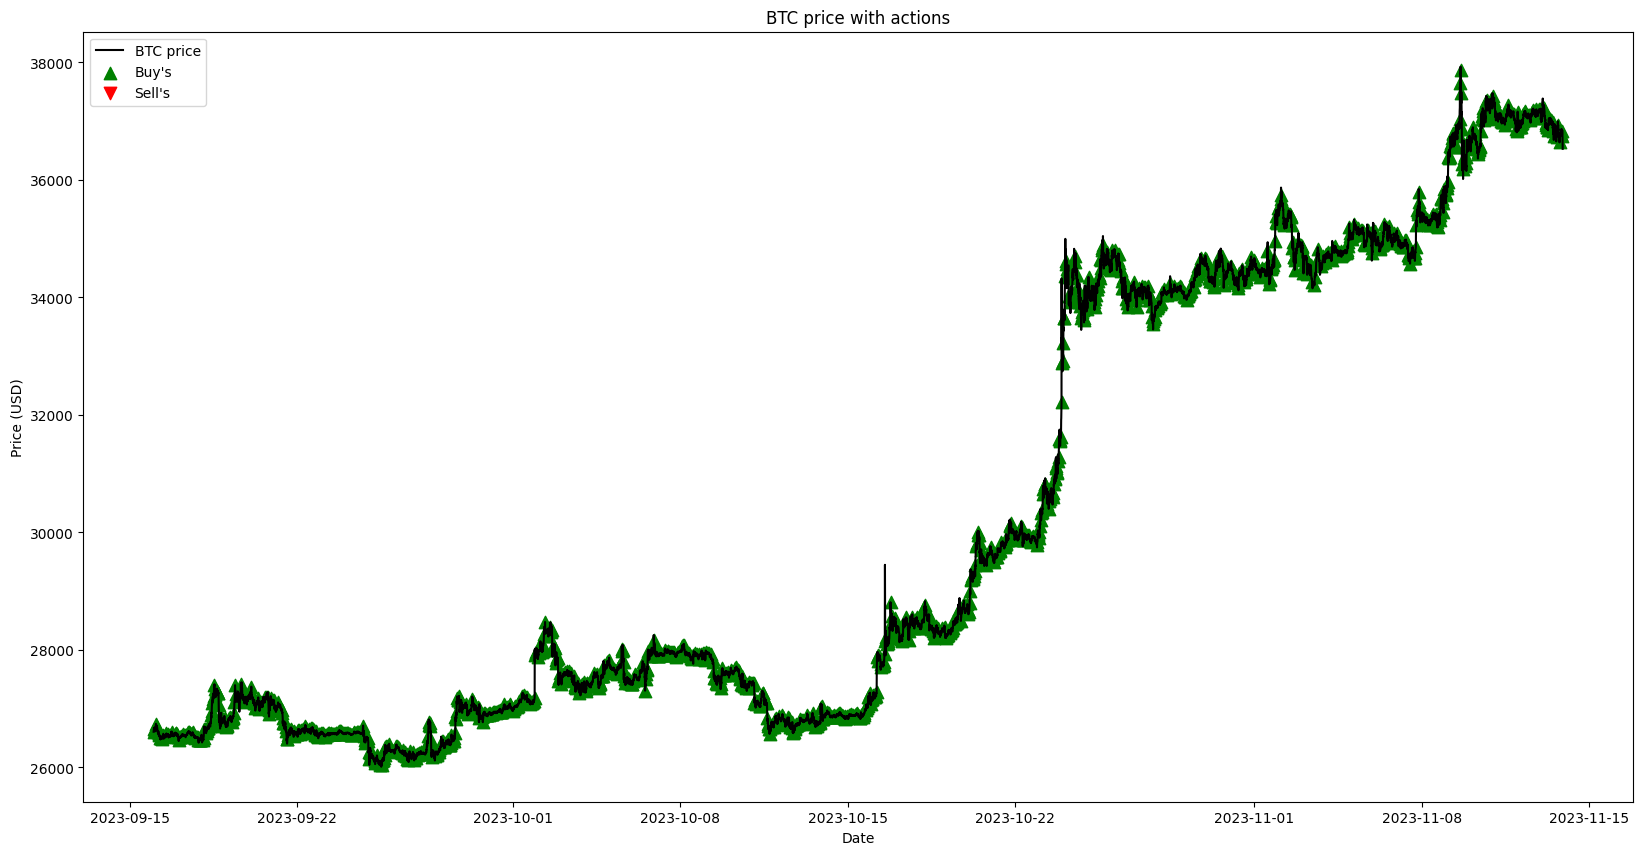

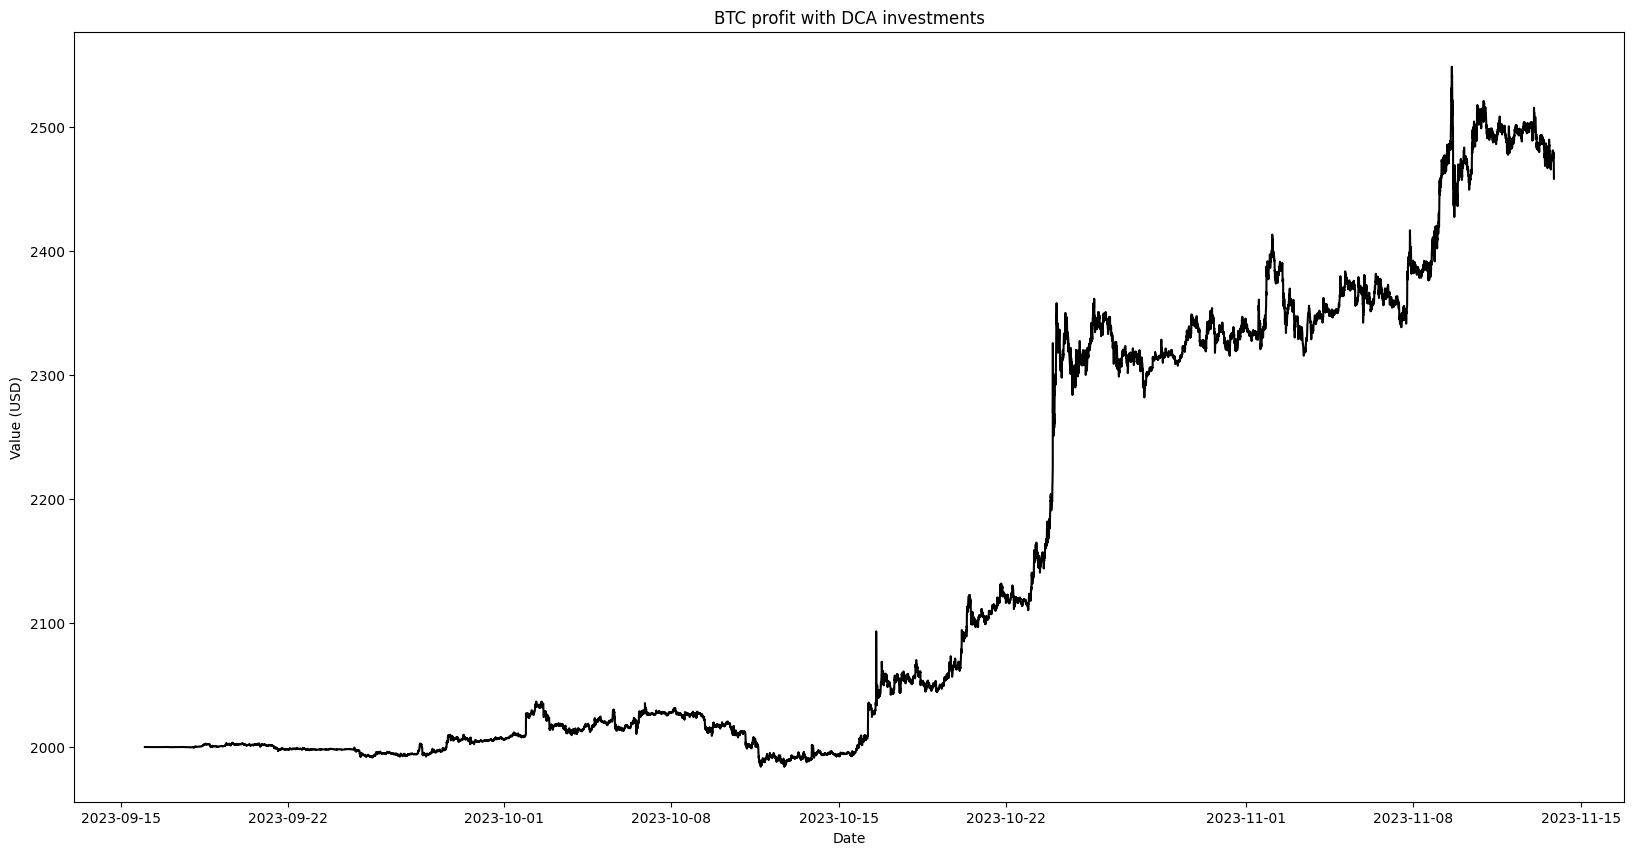

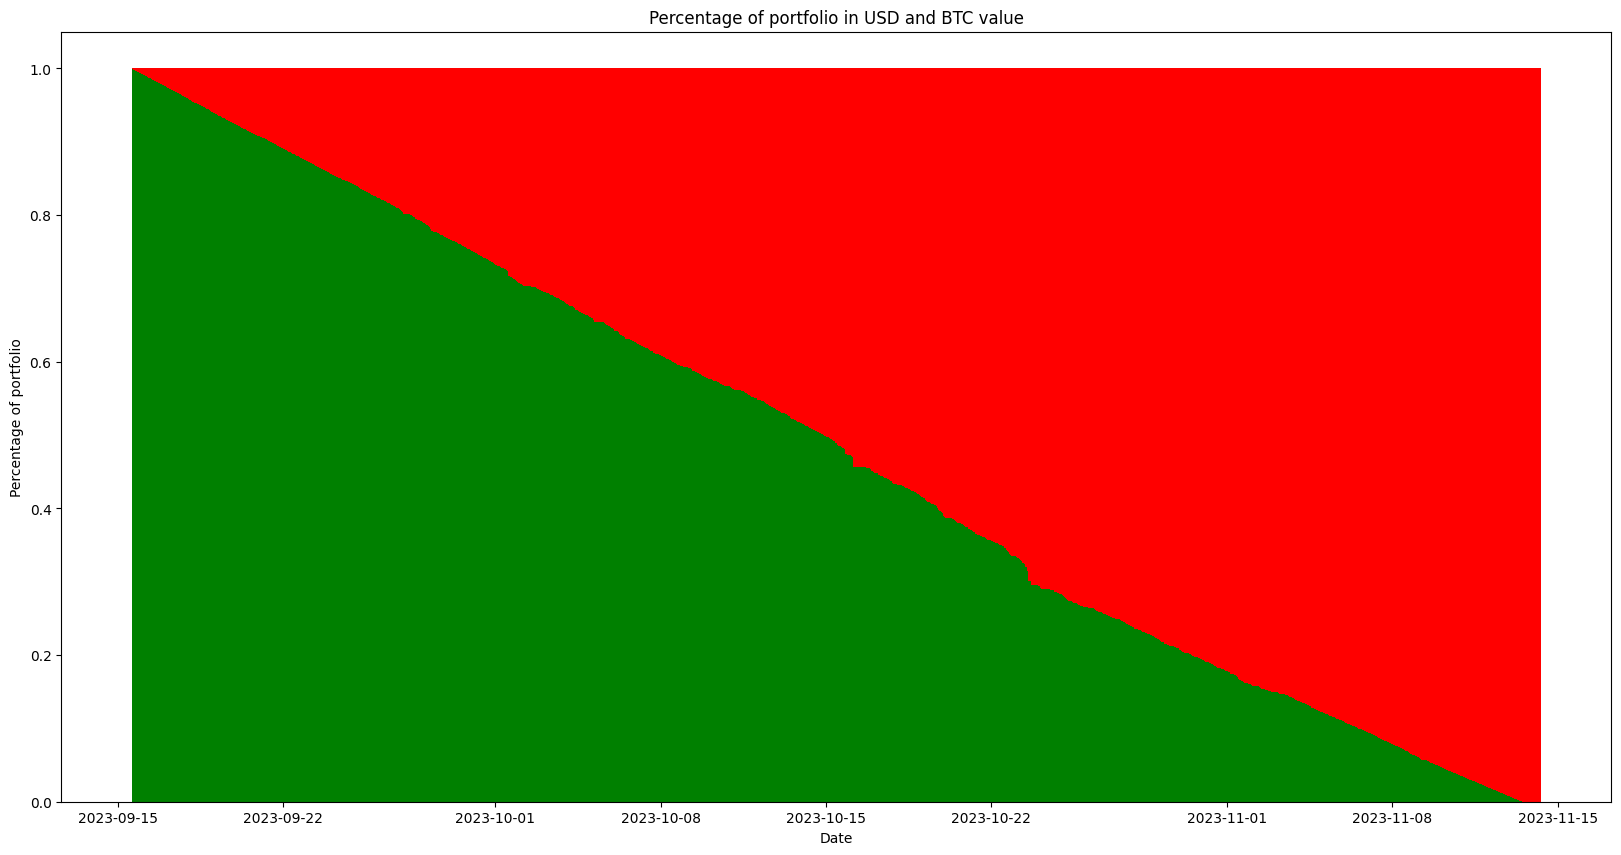

In [4]:
# use DCA as baseline agent
from agents.DCA_agent import DCA_agent
from math import ceil

dca_interval = config["DCA_interval"]["value"]
dca_investment_amount = portfolio_size / ceil(len(coin_data) / dca_interval)

print("DCA_interval:", dca_interval)
print("dca_investment_amount:", dca_investment_amount)

dca_agent = DCA_agent(dca_interval, dca_investment_amount)

dca_actions = dca_agent.act(coin_data)
dca_investment = dca_agent.get_investments(coin_data)

# plot DCA actions
plot_actions(coin_data, dca_actions, "BTC")
plot_profit(coin_data, dca_investment, "BTC", "DCA")

bb_window: 20
bb_std: 3


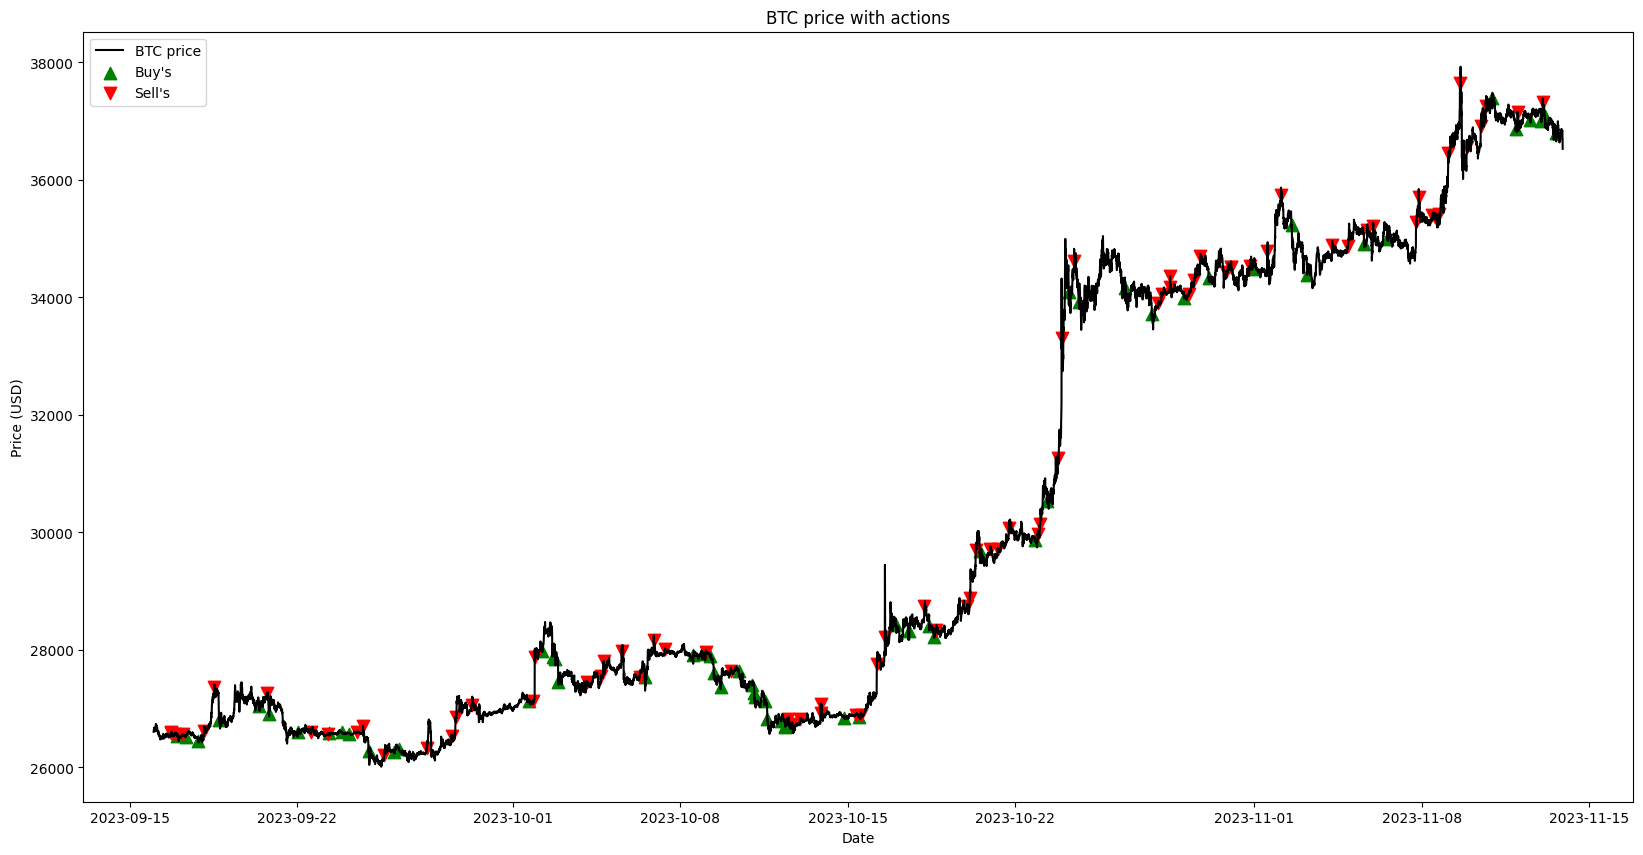

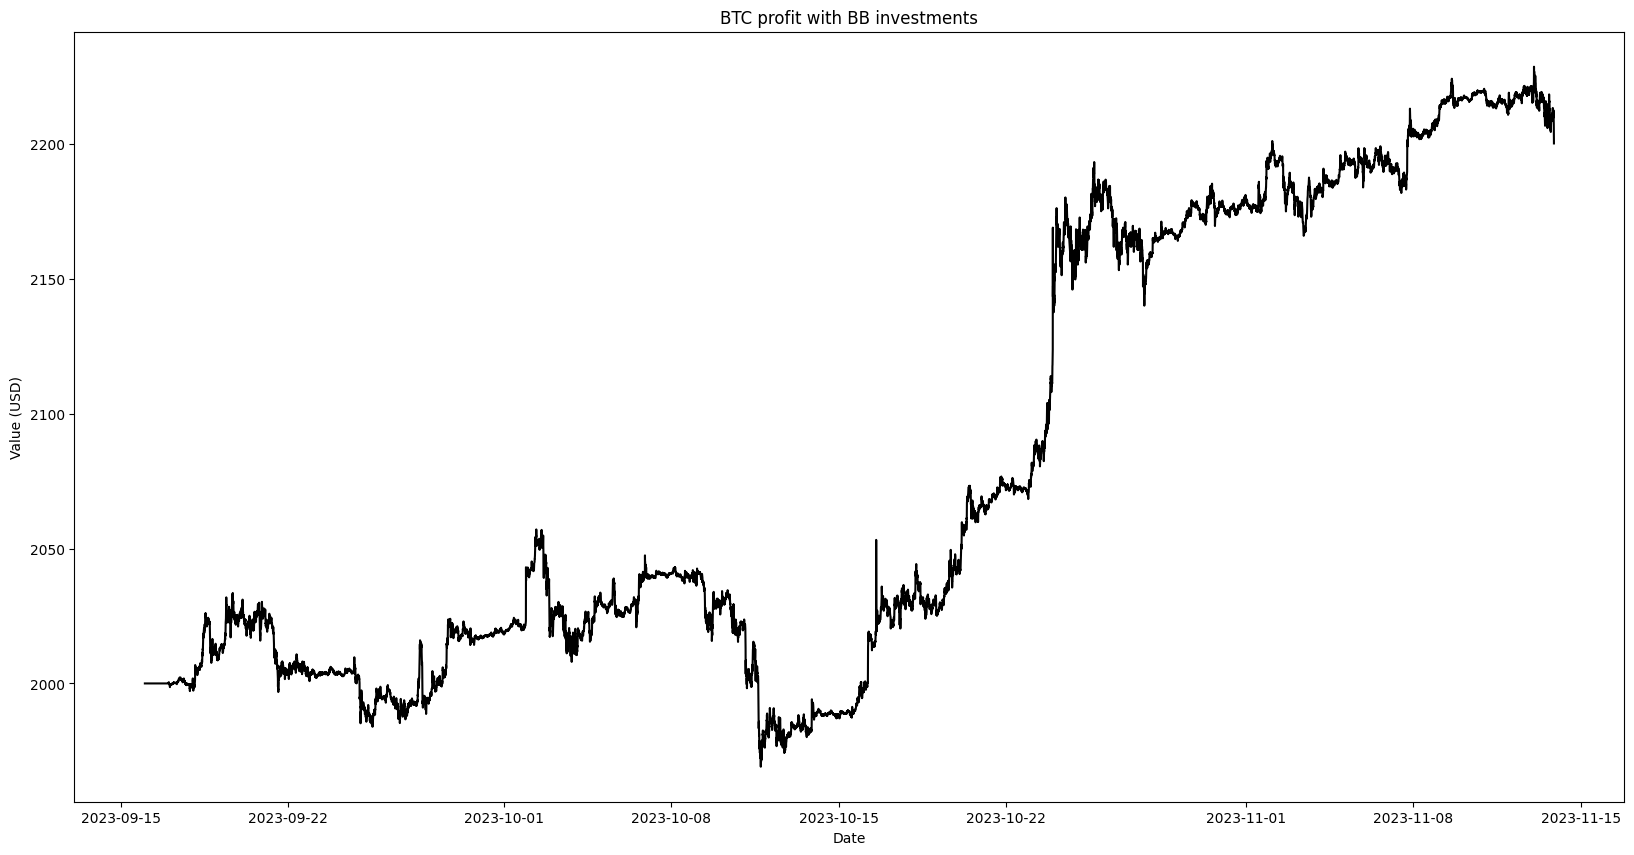

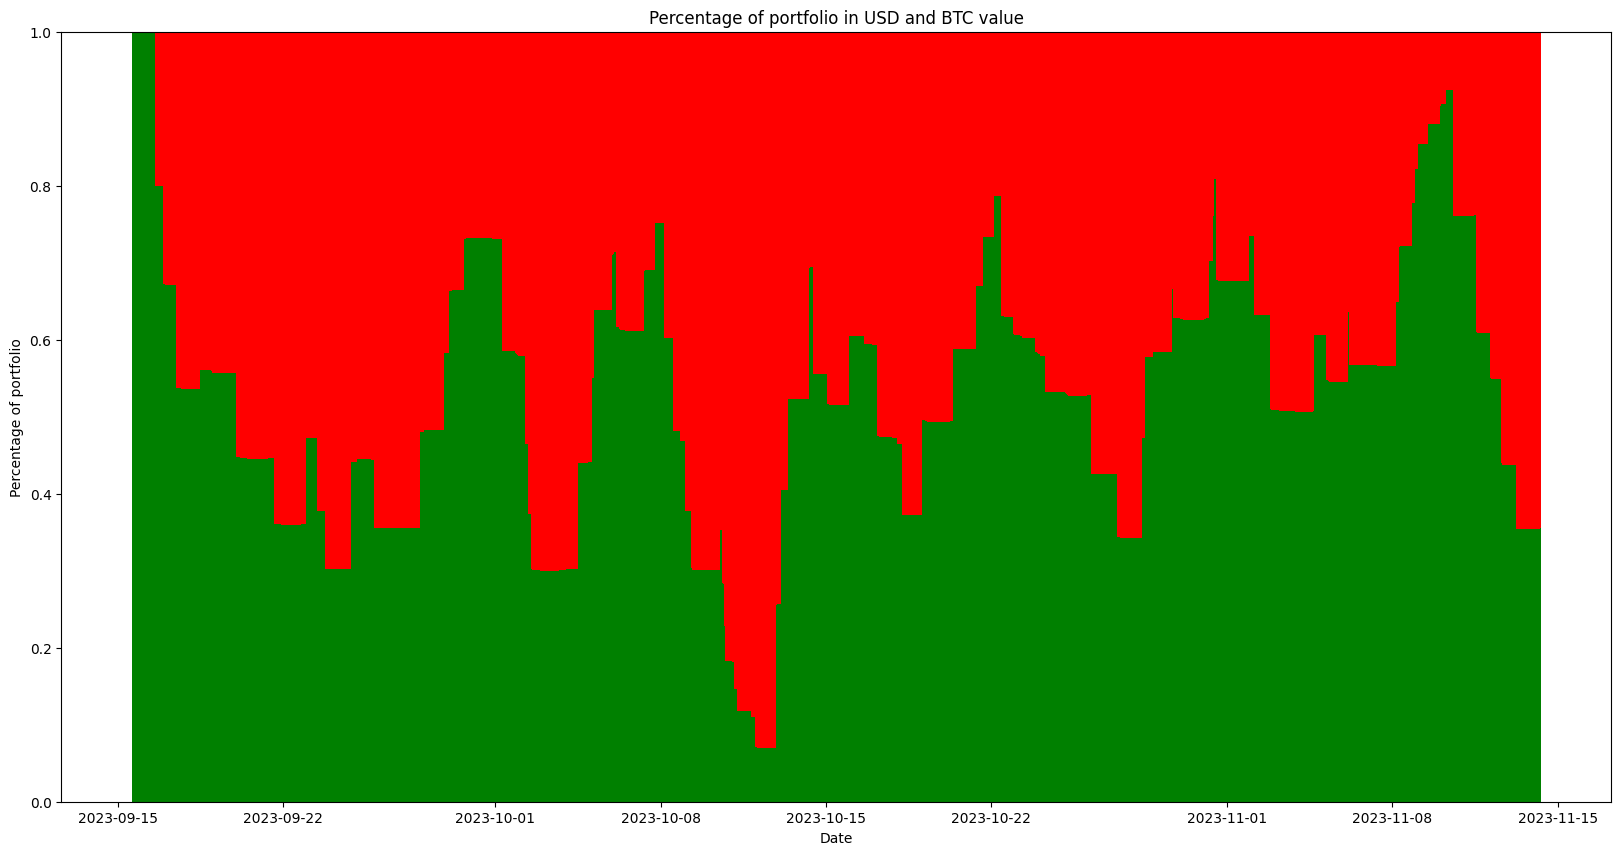

In [6]:
# BB agent
from agents.BB_agent import BB_agent
from agents.investors.simple_stop_loss_investor import SimpleStopLossInvestor

# bb_window = config["BB_window"]["value"]
# bb_std = config["BB_std"]["value"]

bb_window = 20
bb_std = 3

print("bb_window:", bb_window)
print("bb_std:", bb_std)

# TODO: use BO to find parameters that maximize returns
bb_agent = BB_agent(bb_window, bb_std)
bb_actions = bb_agent.act(coin_data)

stop_loss = 0.05
portfolio_allocation = 0.2
assets_allocation = 0.2

# TODO: fix
bb_investments = SimpleStopLossInvestor(portfolio_size, stop_loss, portfolio_allocation, assets_allocation).get_investments(coin_data, bb_actions)

# plot BB actions
plot_actions(coin_data, bb_actions, "BTC")
plot_profit(coin_data, bb_investments, "BTC", "BB")